### Manejo de información en Python

En este cuaderno mostraremos distintas maneras para manejar información en las que se puede usar Python para diversos formatos.


In [1]:
import pandas as pd
import json
import yaml
from zipfile import ZipFile


## Archivos zip


Podemos trabajar con archivos zip con la libreria zipfile 

Podemos listar los archivos 

In [3]:
with ZipFile("ss4_datos.zip", 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

FileNotFoundError: [Errno 2] No such file or directory: 'ss4_datos.zip'

Podemos extraer todos los archivos

In [ ]:
with ZipFile("datos.zip", 'r') as zip:
  zip.extract("penguins.csv")

Podemos extraer un solo archivo 



In [ ]:
with ZipFile("datos.zip", 'r') as zip:
    zip.extractall()

## Archivos básicos

El ejemplo más común y básico es utilizar archivos de texto, los cuales se pueden abrir con la herramienta open y así acceder a su contenido.

In [ ]:
with open('archivo_texto.txt',"r") as f:
    read_data = f.read()
read_data

'primera linea\nsegunda linea\n'

De la misma manera es posible escribir contenido en archivos y guardarlo para posterior uso.


In [ ]:
with open('archivo_texto.txt',"a") as f:
  f.write('Tercera linea\n')
  
with open('archivo_texto.txt',"r") as f:
    for linea in f:
      print(linea, end='')

primera linea
segunda linea
Tercera linea
Tercera linea
Tercera linea


Uno de los formatos soportados de manera nativa por Python es json. En el cual se abre el archivo de la misma manera que en formatos de texto y se lee el contenido con la función load. Lo que obtenemos de esta función es un diccionario de datos con el contenido del archivo.

In [ ]:
with open('archivo_json.json',"r") as f:
  datos_json = json.load(f)
datos_json

Con esto podemos acceder a elementos particulares del diccionario obtenido, así también podemos editar valores para después guardarlos en disco.

In [ ]:
print(datos_json["nombre"])


In [ ]:
datos_json["amigos"] = ["Solin","Luigi Geovany"]
with open('archivo_json_2.json',"w") as f:
  json.dump(datos_json,f)

Un formato que ha ganado popularidad recientemente es el formato yaml el cual tiene la característica detener una mejor legibilidad por humanos.



In [ ]:
with open('archivo_yaml.yaml',"r") as f:
  datos_yaml = yaml.safe_load(f)
datos_yaml

A través de la librería homónima, se puede obtener de este un diccionario de datos de la misma manera que json. Con la información la cual puede ser accedida y modificada. yaml también cuenta con una función para escribir en archivos de la misma manera que json.

In [ ]:
datos_yaml['published']

In [ ]:
datos_yaml['autor'] = 'Irivng'

with open('archivo_yaml_2.yaml',"w") as f:
  yaml.dump(datos_yaml,f)

## Uso de pandas 

Uno de los formatos más ampliamente utilizados para almacenar información es el formato csv. Aunque puede ser leído de la misma manera como un archivo de texto la librería panda nos ayuda a obtener estos archivos y analizarlos de manera sencilla.

In [2]:
df_pinguinos = pd.read_csv("s4_data/penguins.csv")

Pandas soporta también el acceso a otros formatos más especializados como es parquet, orc, Excel, stata, sas, html e incluso SQL.

In [5]:
df_pinguinos = pd.read_parquet("penguins.parquet")
df_pinguinos

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

El objeto obtenido de leer una fuente por pandas es llamado dataframe.
Las columnas de datos pueden ser seleccionadas de manera sencilla al establecer las variables necesarias.


In [3]:
df_pinguinos_textos = df_pinguinos[['species', 'island','sex']]
df_pinguinos_textos

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,female
...,...,...,...
339,Chinstrap,Dream,male
340,Chinstrap,Dream,female
341,Chinstrap,Dream,male
342,Chinstrap,Dream,male


También es posible filtrar los registros respecto a uno o varios valores de columnas. Por ejemplo, en esta tabla nos concentramos sólo en los elementos con masa mayor a 4000.

In [4]:
df_pinguinos_gordos = df_pinguinos[df_pinguinos["body_mass_g"] > 4000]
df_pinguinos_gordos = df_pinguinos[df_pinguinos["body_mass_g"] > 4000][['species', 'island']]
df_pinguinos_gordos

,species,island
7,Adelie,Torgersen
9,Adelie,Torgersen
14,Adelie,Torgersen
17,Adelie,Torgersen
19,Adelie,Torgersen
...,...,...
321,Chinstrap,Dream
323,Chinstrap,Dream
329,Chinstrap,Dream
333,Chinstrap,Dream


La manera en que funciona esto es que primero se calcula un vector booleano donde verdadero son los datos incluidos en la tabla, y falso son los que serán omitidos.

In [5]:
df_pinguinos["body_mass_g"] > 4000

0      False
1      False
2      False
3      False
4      False
       ...  
339    False
340    False
341    False
342     True
343    False
Name: body_mass_g, Length: 344, dtype: bool

Las tablas de datos permiten también la creación de gráficos de manera rápida. Aunque para un control más fino y gráficos detallados, se recomiendan otras herramientas como matplotlib y seaborn.

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

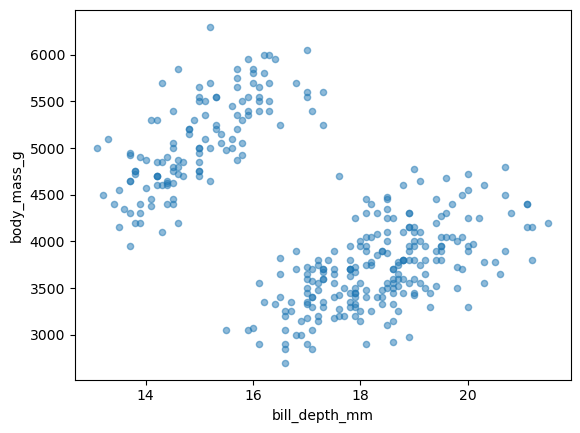

In [6]:
df_pinguinos.plot.scatter(x="bill_depth_mm", y="body_mass_g", alpha=0.5)

Podemos calcular nuevas variables en base a las existentes a través de operaciones básicas que se realizan de manera eficiente. no se recomienda el uso en pandas de ciclos para atravesar la estructura de la tabla.

In [7]:
df_pinguinos["bill_area_mm2"] = (df_pinguinos["bill_length_mm"] * df_pinguinos["bill_depth_mm"]	) / 2
df_pinguinos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_area_mm2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,365.585
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,343.650
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,362.700
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,354.155
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,552.420
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,393.675
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,451.360
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,482.600


También se tiene fácil acceso a funciones de agregación, por ejemplo la media la cual es calculada para las variables pertinentes.

In [8]:
df_pinguinos.mean()

/tmp/ipykernel_4720/2626396195.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pinguinos.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
bill_area_mm2         375.392822
dtype: float64

Una función muy útil es la de describe, la cual nos da una serie de agregaciones distintas para todas las variables disponibles.

In [9]:
df_pinguinos.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,bill_area_mm2
count,342.000000,342.000000,342.000000,342.000000,344.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070,375.392822
std,5.459584,1.974793,14.061714,801.954536,0.818356,57.710815
min,32.100000,13.100000,172.000000,2700.000000,2007.000000,248.775000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000,333.845000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000,365.412500
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000,403.577500
max,59.600000,21.500000,231.000000,6300.000000,2009.000000,563.680000


Si es de nuestro interés calcular agregaciones por clases es también posible utilizando groupby.

In [10]:
df_pinguinos.groupby(["species","island"]).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Adelie    Biscoe          38.975000      18.370455         188.795455   
          Dream           38.501786      18.251786         189.732143   
          Torgersen       38.950980      18.429412         191.196078   
Chinstrap Dream           48.833824      18.420588         195.823529   
Gentoo    Biscoe          47.504878      14.982114         217.186992   

                     body_mass_g         year  bill_area_mm2  
species   island                                              
Adelie    Biscoe     3709.659091  2008.136364     358.668977  
          Dream      3688.392857  2008.000000     352.060179  
          Torgersen  3706.372549  2007.923077     359.416373  
Chinstrap Dream      3733.088235  2007.970588     450.994559  
Gentoo    Biscoe     5076.016260  2008.080645     356.826626

Podemos tambien ordenar los registros respecto a alguna variable de interés.

In [12]:
df_pinguinos.sort_values("body_mass_g")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_area_mm2
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008,389.270
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008,311.220
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008,302.950
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009,328.100
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008,266.455
...,...,...,...,...,...,...,...,...,...
269,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,male,2009,395.280
185,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male,2007,506.600
169,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,male,2007,373.920
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN


En algunos casos es necesario cambiar la estructura de la tabla y convertir, por ejemplo, valores y agregaciones de filas en columnas. Esto se logra a través de pivot_table.

In [ ]:
df_pinguinos.pivot_table(
    values="bill_length_mm", 
    index="year", 
    columns="species", 
    aggfunc="mean",
    margins=True
)

El caso inverso es también posible al convertir valores de columnas en valores de registros a través de la función melt.

In [ ]:
df_pinguinos[["species",	"island",	"bill_length_mm",	"bill_depth_mm",	"flipper_length_mm"]].melt(
    id_vars=["species",	"island",]
)